# Genotype-filtered Prevalence and Interactive Area-under-curve Plot
Config: 40-yr-simu, 50,000-popu, 0.7-treatment-cvrg, DHAPPQ-ASAQ-AL-cycling

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import mpld3
from mpld3 import plugins

In [4]:
plt.rcParams['figure.figsize'] = [20,10]

In [5]:
# creating dfs from file
df1 = pd.read_csv('new-monthly_data_0.txt', sep='\t')

In [6]:
# scale func to show x-axis in years
scale_x = 365
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))

Text(0.5, 1.0, 'Blood Slide Prev. Plot')

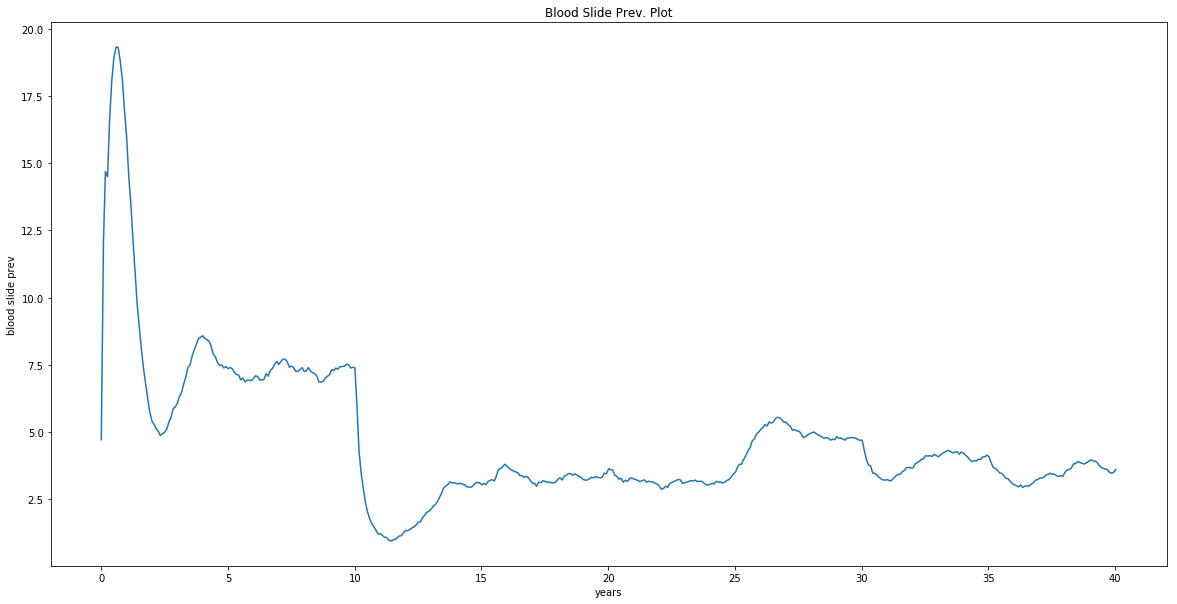

In [7]:
# total population blood_slide_prevalence plot
fig, ax1 = plt.subplots()
ax1.plot(df1['current_time'], df1['blood_slide_prev'])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1825)) # 5-year mark
ax1.xaxis.set_major_formatter(ticks_x)
ax1.set_xlabel('years')
ax1.set_ylabel('blood slide prev')
ax1.set_title('Blood Slide Prev. Plot')

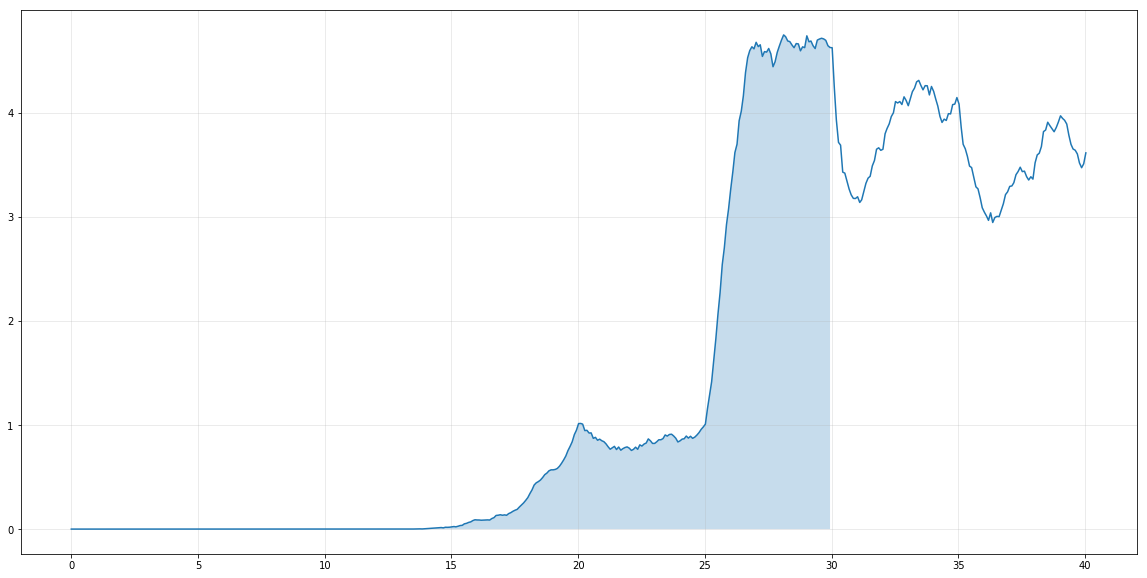

In [9]:
# blood slide prev w.r.t. genotype frequency
fig, ax2 = plt.subplots()
ax2.grid(True, alpha=0.3)
df1['new_bsp'] = df1['blood_slide_prev'] * df1.iloc[:,0:151].filter(regex='.....Y2.', axis=1).sum(axis=1)
ax2.plot(df1['current_time'], df1['new_bsp'])
ax2.fill_between(df1['current_time'], df1['new_bsp'], 
                 where=(df1['current_time']<30*365), alpha=0.25)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1825)) # 5-year mark
ax2.xaxis.set_major_formatter(ticks_x)

# define interactive legend

handles, labels = ax2.get_legend_handles_labels() # return lines and labels
interactive_legend = plugins.InteractiveLegendPlugin(zip(handles,
                                                         ax2.collections),
                                                     labels,
                                                     alpha_unsel=0.5,
                                                     alpha_over=1.5, 
                                                     start_visible=True)

#ax1.set_xlabel('years')
#ax1.set_ylabel('blood slide prev')
#ax1.set_title('Blood Slide Prev. Plot')


In [10]:
np.trapz(df1.iloc[:30*12,-1])

307.39457760769545